# Imports

In [1]:
from src.statistic_functions import *
from src.digit_functions import loadTestDigits
from src.sudoku_functions import loadSudokus
from src.feature_functions import *
from Models import *

import torch
import numpy as np
import matplotlib.pyplot as plt

# Evaluation

In [2]:
sudokus = loadSudokus("./data/sudokus/")

(+) Reading data from .npy file...
(+) Sudoku loading finished


## Pixel Model

In [3]:
pixelModel = torch.load("./models/pixel.pth")
digits = loadTestDigits("./data/digits/transformed/pixel/")
print(digits[0].shape)
print(digits[1].shape)

(+) Reading data from .npy file...
(+) Digit loading finished
(78750, 1600)
(78750,)


Digits

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 1.0!
(+) Model evaluation finished


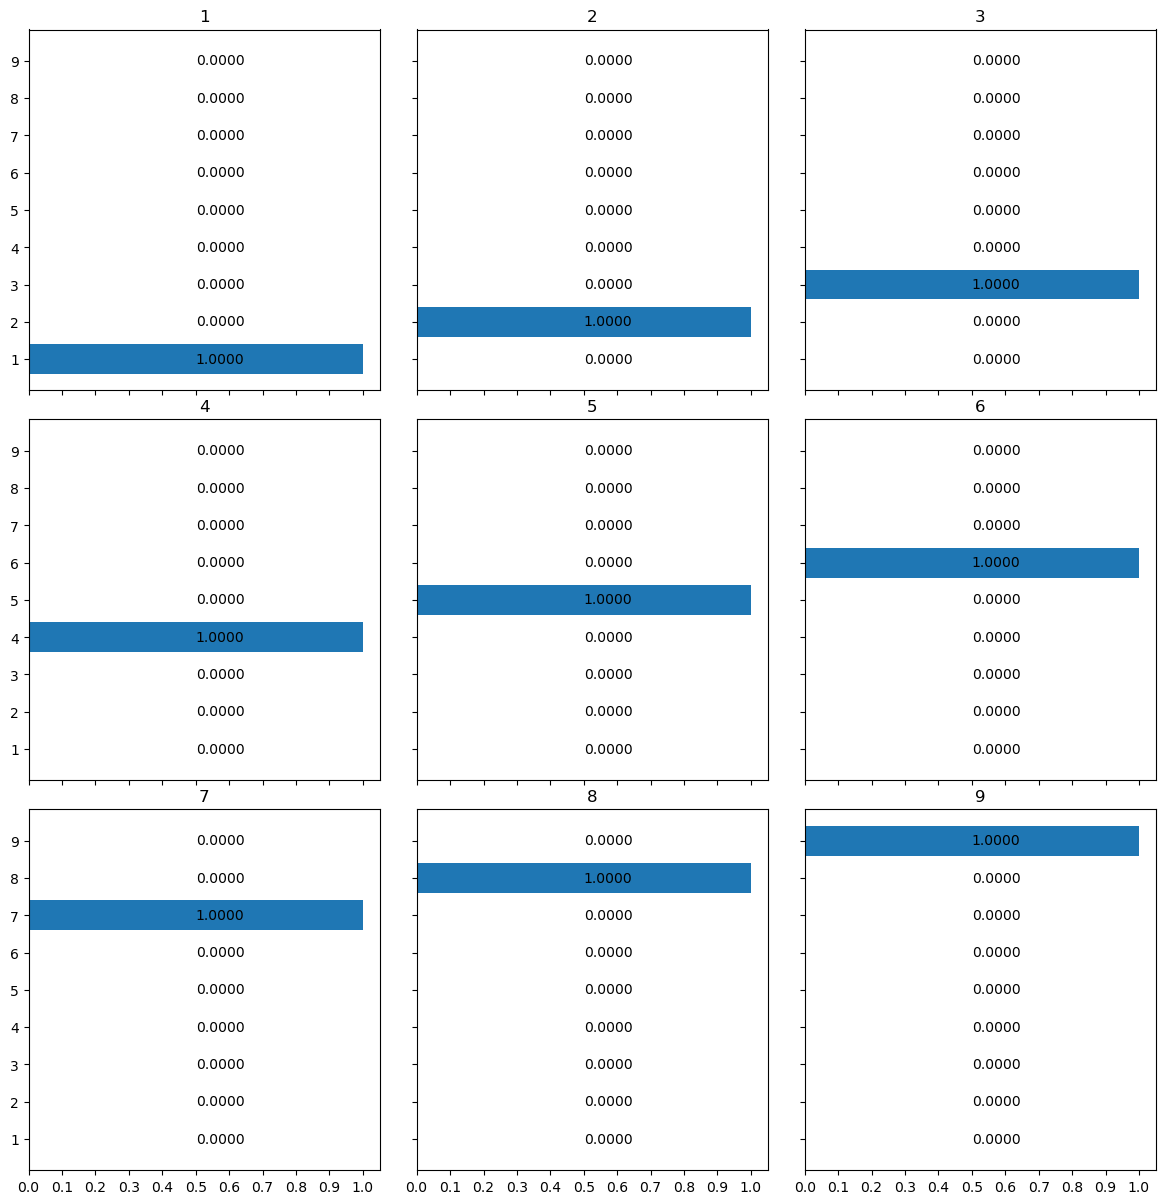

In [4]:
evaluateModelOnGeneratedDigits(pixelModel, digits)
plt.savefig("./figures/pixelModelPerformanceOnDigits.png")

Sudokus

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.9387!
(+) Model would have solved 22 out of 53!
(+) Model evaluation finished


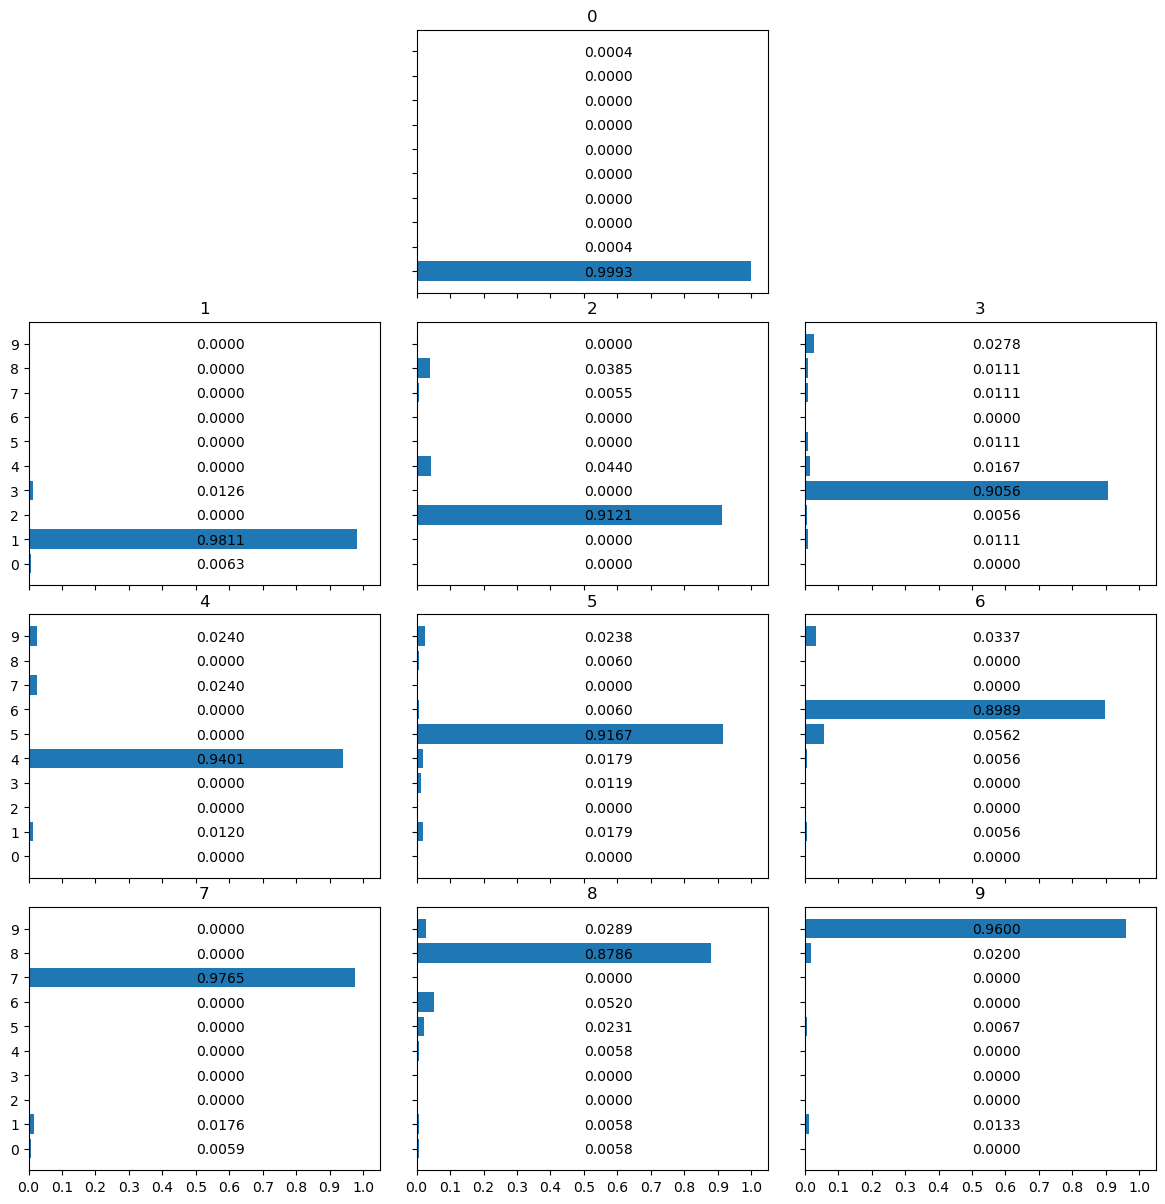

In [5]:
evaluateModelOnSudokus(pixelModel, pixelFeatureFunction, sudokus)
plt.savefig("./figures/pixelModelPerformanceOnSudokus.png")

## Pixel Density Model

In [6]:
pixelDensityModel = torch.load("./models/pixelDensity.pth")
digits = loadTestDigits("./data/digits/transformed/pixelDensity/")
print(digits[0].shape)
print(digits[1].shape)

(+) Reading data from .npy file...
(+) Digit loading finished
(78750, 80)
(78750,)


Digits

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.9999!
(+) Model evaluation finished


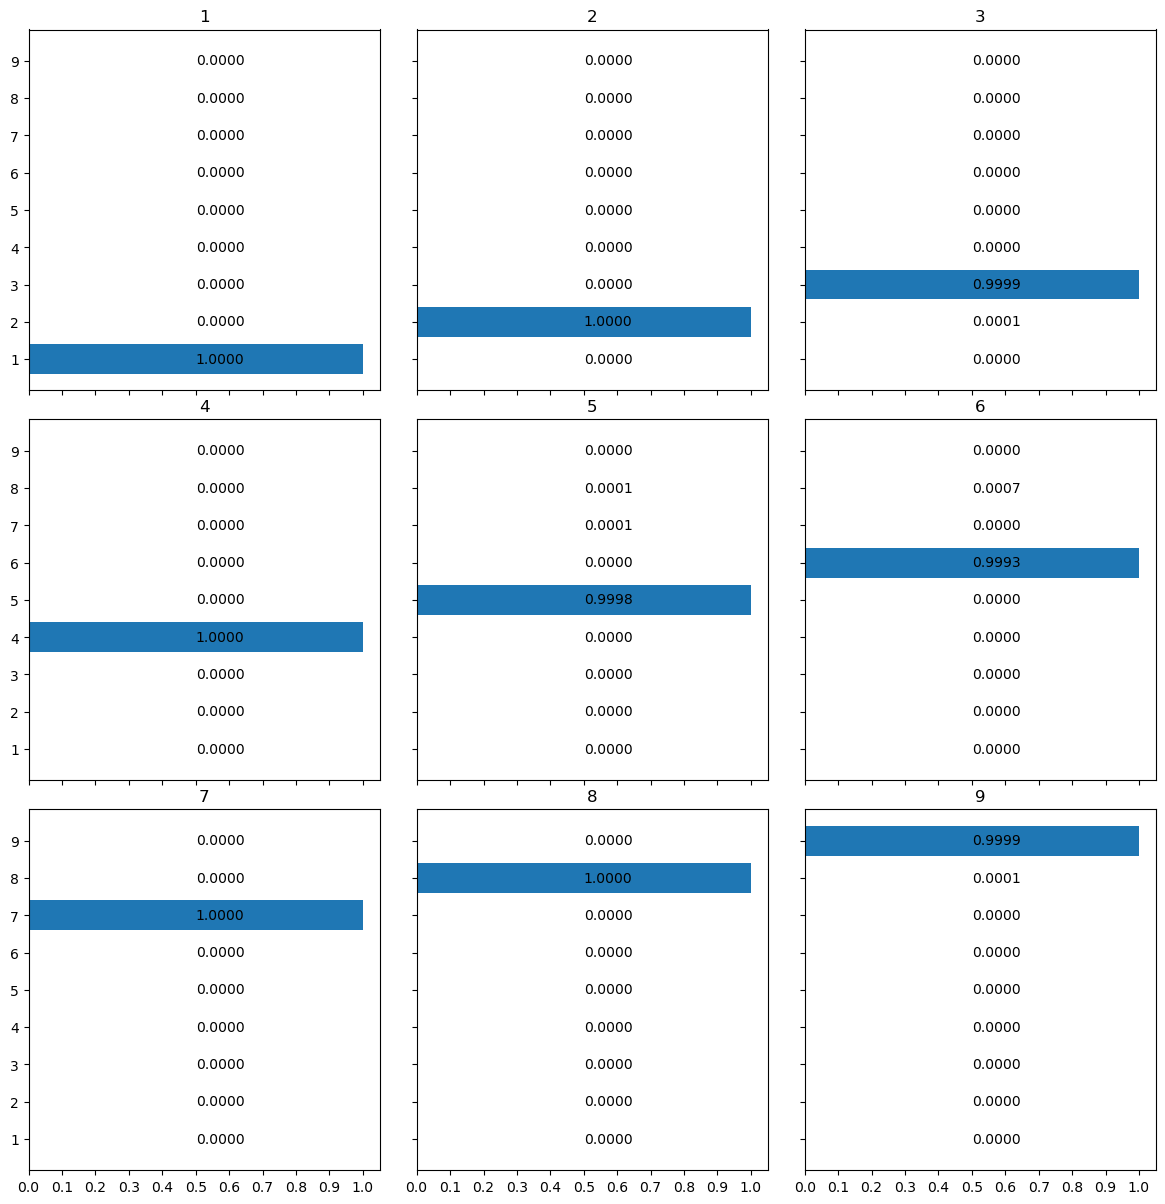

In [7]:
evaluateModelOnGeneratedDigits(pixelDensityModel, digits)
plt.savefig("./figures/pixelDensityModelPerformanceOnDigits.png")

Sudokus

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.9338!
(+) Model would have solved 11 out of 53!
(+) Model evaluation finished


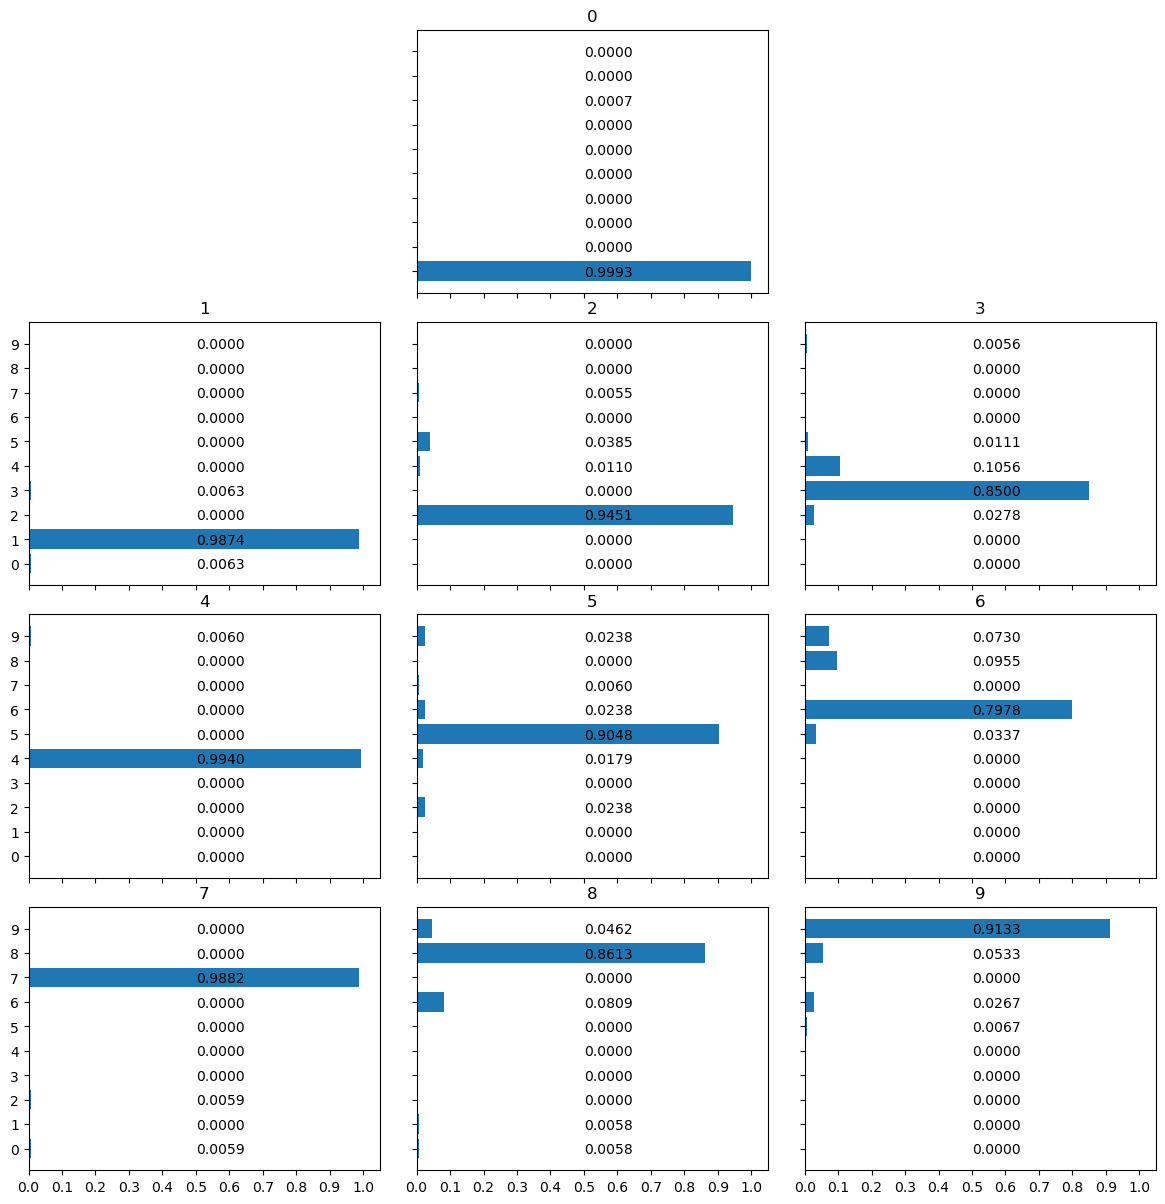

In [8]:
evaluateModelOnSudokus(pixelDensityModel, pixelDensityFeatureFunction, sudokus)
plt.savefig("./figures/pixelDensityModelPerformanceOnSudokus.png")

## Image Gradient Density Model

In [9]:
imageGradientDensityModel = torch.load("./models/imageGradientDensity.pth")
digits = loadTestDigits("./data/digits/transformed/imageGradientDensity/")
print(digits[0].shape)
print(digits[1].shape)

(+) Reading data from .npy file...
(+) Digit loading finished
(78750, 8)
(78750,)


Digits

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.978!
(+) Model evaluation finished


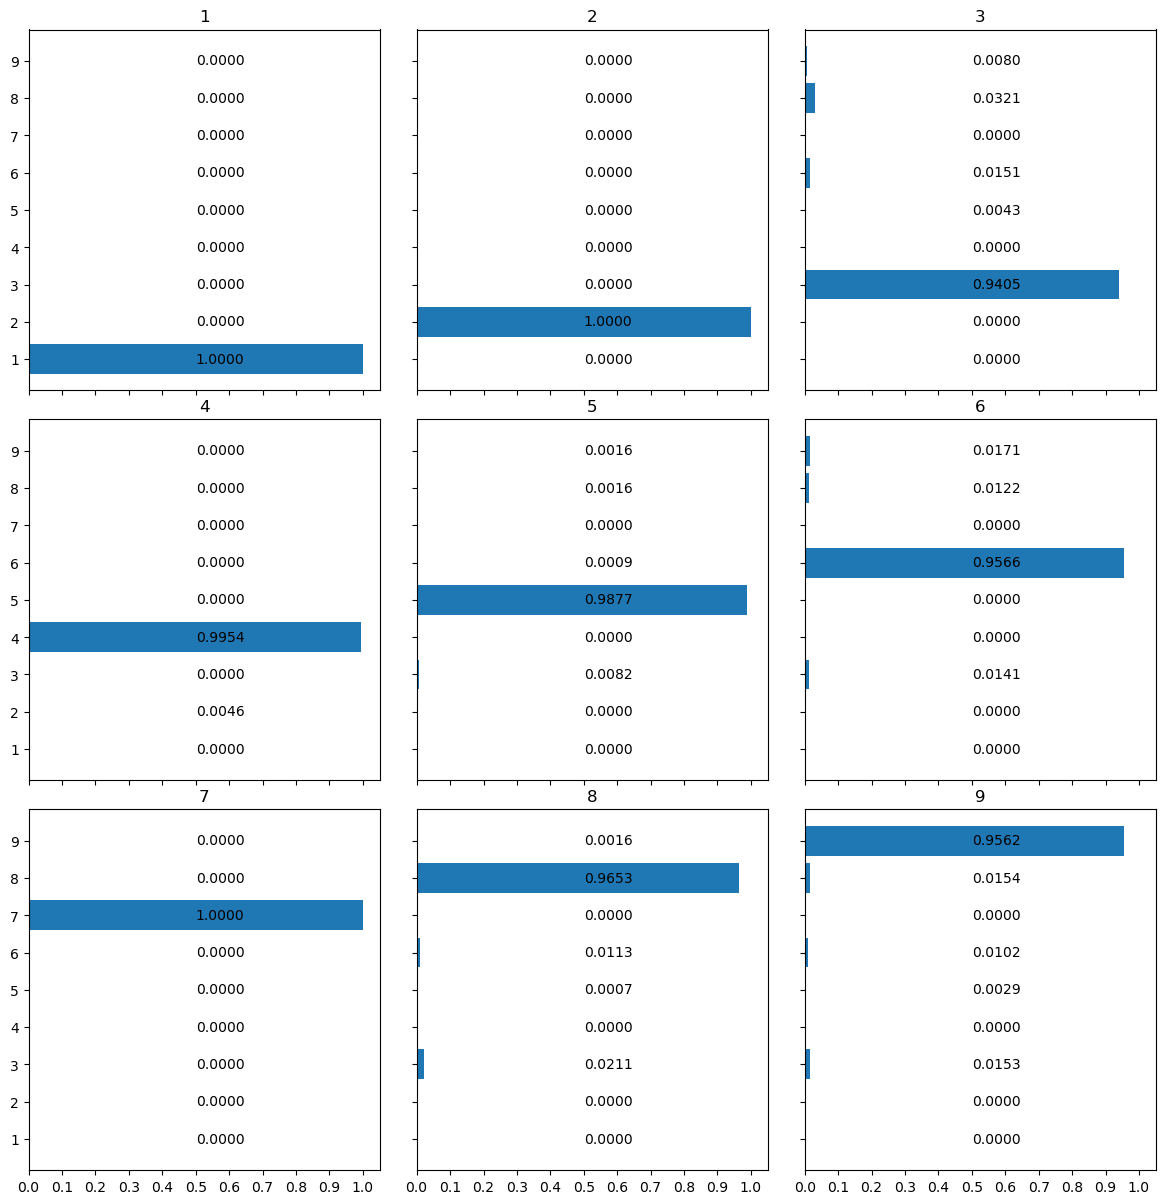

In [10]:
evaluateModelOnGeneratedDigits(imageGradientDensityModel, digits)
plt.savefig("./figures/imageGradientDensityModelPerformanceOnDigits.png")

Sudokus

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.7394!
(+) Model would have solved 0 out of 53!
(+) Model evaluation finished


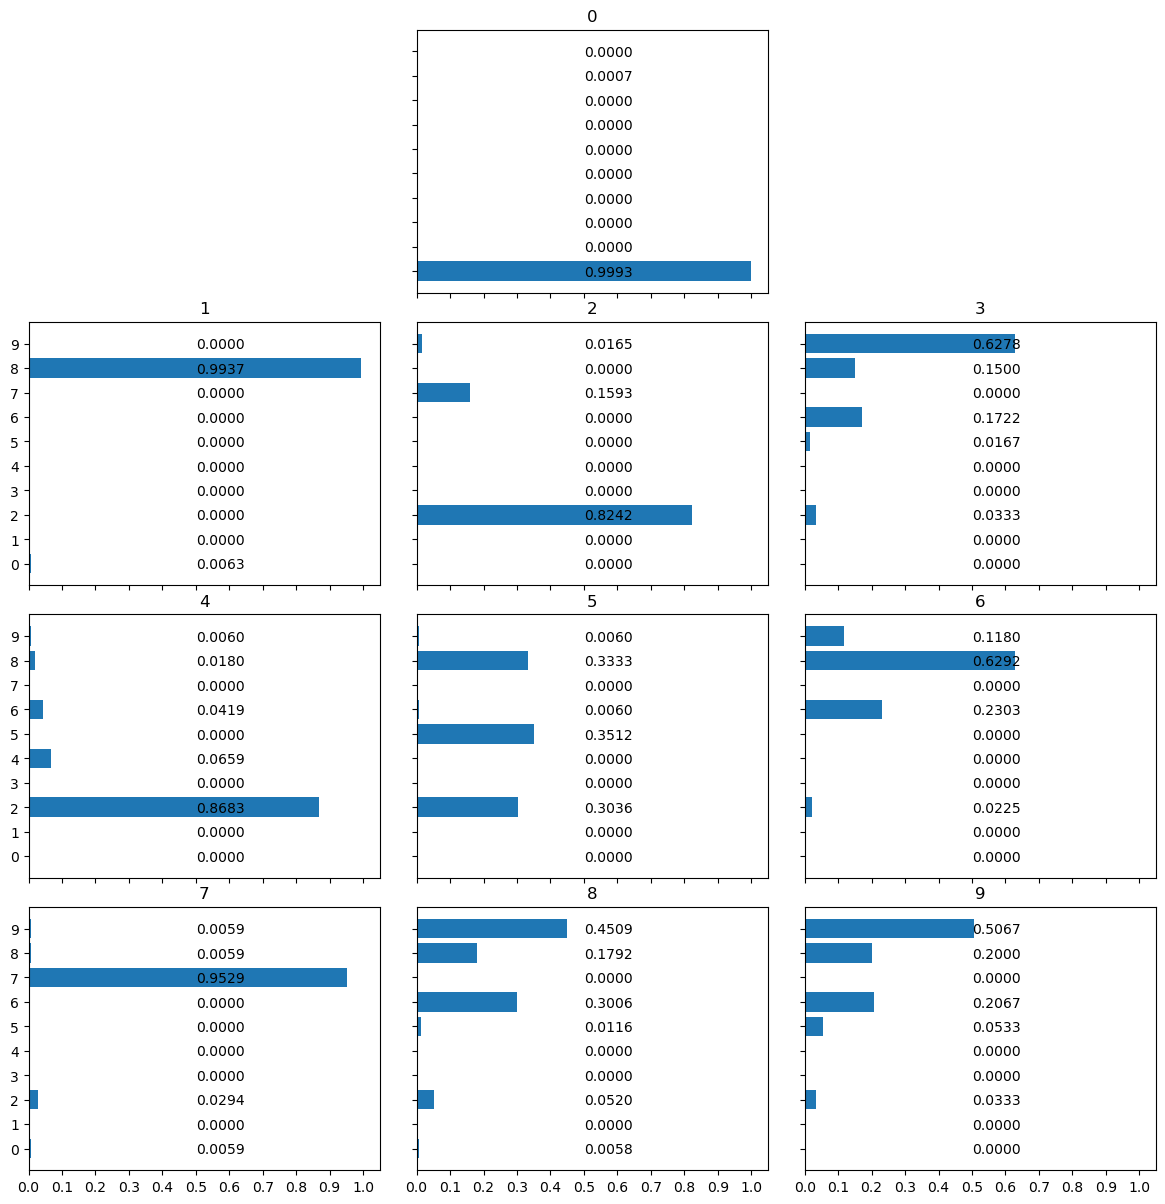

In [11]:
evaluateModelOnSudokus(imageGradientDensityModel, imageGradientDensityFeatureFunction, sudokus)
plt.savefig("./figures/imageGradientDensityModelPerformanceOnSudokus.png")

## Ensemble

(+) Starting model evaluation...
(+) Model achieved an overall accuracy of 0.9394!
(+) Model would have solved 14 out of 53!
(+) Model evaluation finished


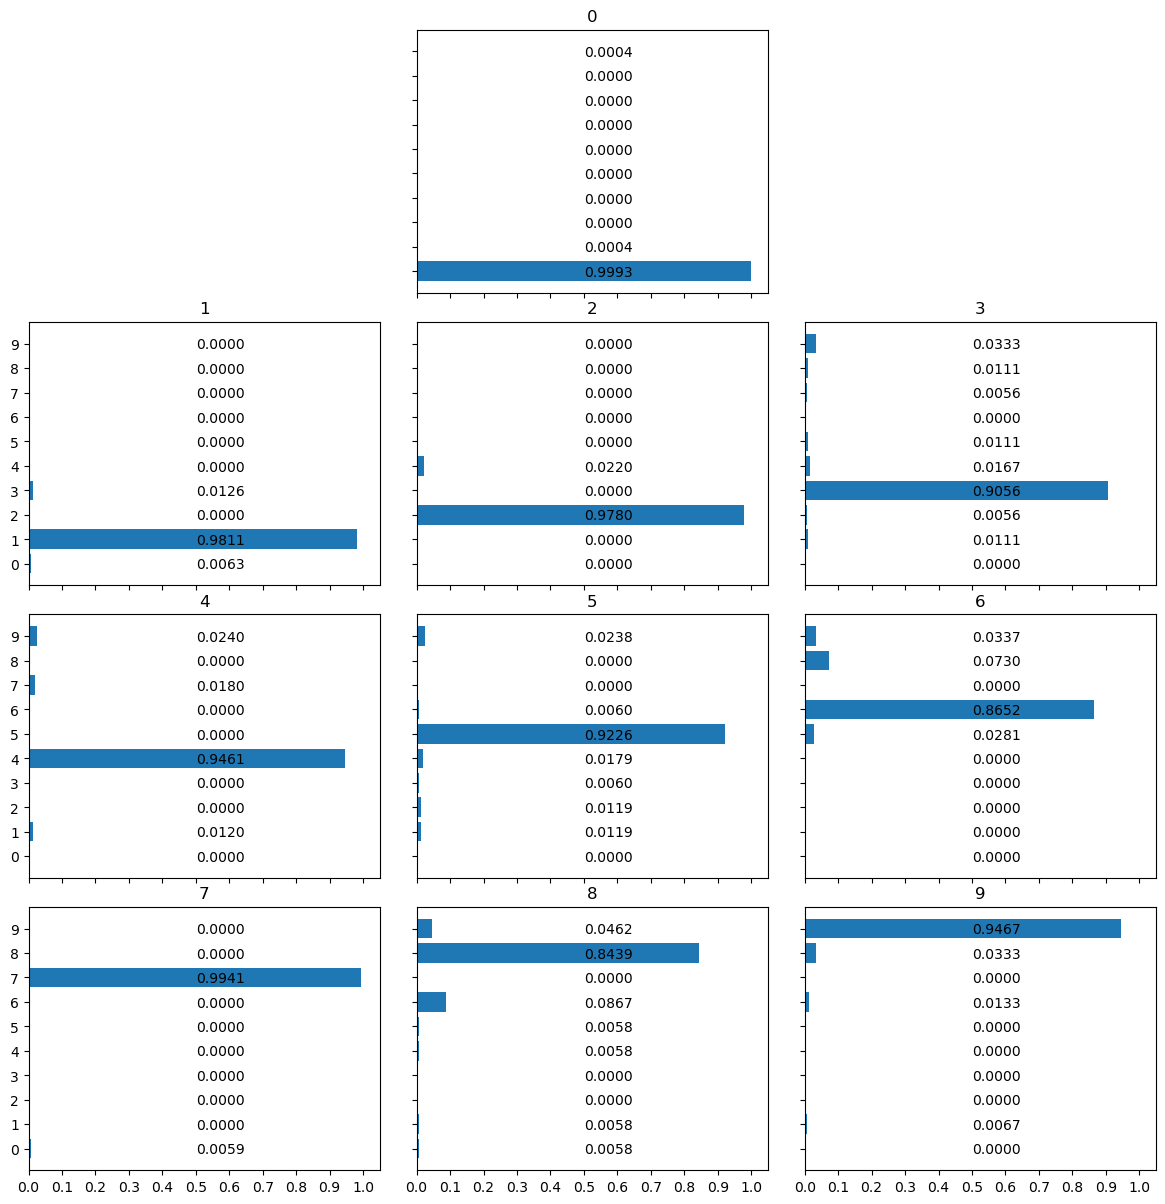

In [12]:
ensemble = [pixelModel, pixelDensityModel, imageGradientDensityModel]
features = [pixelFeatureFunction, pixelDensityFeatureFunction, imageGradientDensityFeatureFunction]

evaluateModelOnSudokus(ensemble, features, sudokus)
plt.savefig("./figures/ensembleModelPerformanceOnSudokus.png")